In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.models import load_model
img_width, img_height = 216, 384

In [49]:
class_names = ['brak', 'wada banderoli', 'wada nakretki', 'Ok nakrętka i banderola']

In [4]:
def make_prediction(src, model, show_image):
    for root, subdirs, files in os.walk(src):
        for images in files:
            img = Image.open(root + images)
            img = img.resize((img_width, img_height))
            if(show_image):
                img.show()
            #img = np.array(img).astype('float32')
            #img = img / 255.0
            X_to_predict = np.expand_dims(img, axis=0)
            y_pred = model.predict(X_to_predict)
            prediction_class = y_pred.argmax()
            
            print(prediction_class)
            print(class_names[prediction_class])
            print(y_pred)
            

print(class_names)

['Brak banderolo', 'Brak nakrętka', 'Niedokręcona', 'Ok nakrętka i banderola', 'Przekrzywiona nakrętka']


# Do odczytu

In [75]:
model2 = load_model('4_klasy.03-0.26.h5')

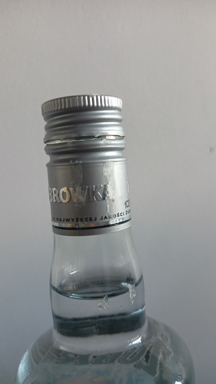

2
wada nakretki
[[9.5048589e-13 3.3600887e-07 9.9999964e-01 5.1460754e-12]]


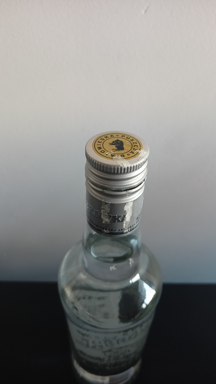

1
wada banderoli
[[2.1922082e-05 9.1556919e-01 8.3578475e-02 8.3037367e-04]]


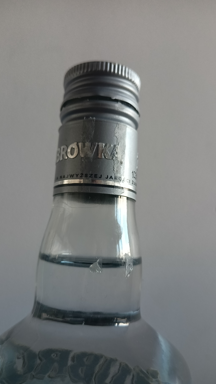

2
wada nakretki
[[1.0036462e-03 2.0929402e-01 7.8915346e-01 5.4884935e-04]]


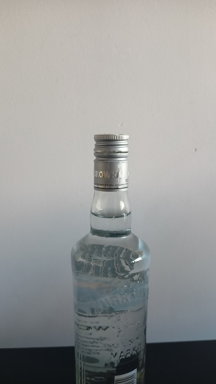

0
brak
[[0.9852225  0.00340183 0.00988446 0.00149108]]


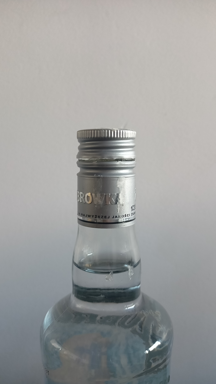

2
wada nakretki
[[4.6684388e-08 7.3075544e-06 9.9999249e-01 1.2548307e-07]]


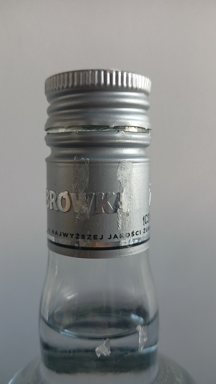

2
wada nakretki
[[2.5598019e-13 1.8610017e-03 9.9813902e-01 8.5239827e-12]]


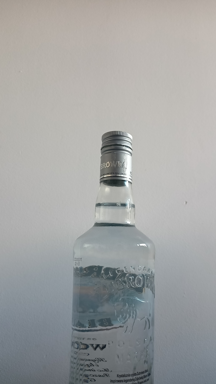

0
brak
[[0.9726618  0.00467679 0.02097889 0.00168251]]


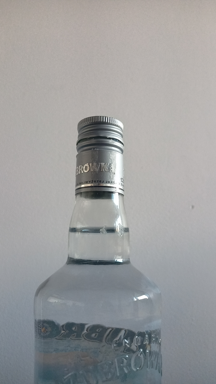

2
wada nakretki
[[0.00940974 0.30277252 0.6839933  0.00382451]]


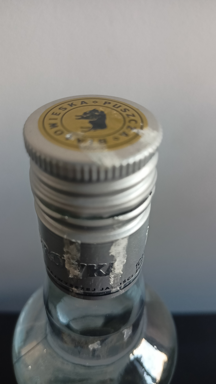

2
wada nakretki
[[1.7039351e-04 1.3540798e-02 9.8621666e-01 7.2194161e-05]]


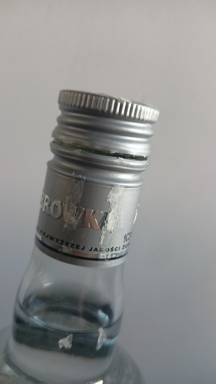

2
wada nakretki
[[3.6492208e-15 1.5921902e-08 1.0000000e+00 6.7152738e-15]]


In [70]:
make_prediction('dataset/testy_nakretka/Test brak banderoli/', model2, True)

In [36]:
def check_prediction(src, class_directories, model):
    for index, class_dirs in enumerate(class_directories):
        for directory_name in class_dirs:
            full_dir_name = "{src}{dir}".format(src=src, dir = directory_name)
            print("Sprawdzanie folderu '{dir_name}' jako '{class_name}'".format(dir_name = full_dir_name, class_name = class_names[index]))
            class_images = 0
            class_correct_images = 0
            for root, subdirs, files in os.walk(full_dir_name):
                for images in files:
                    img = Image.open(root + images)
                    img = img.resize((img_width, img_height))
                    #img = np.array(img).astype('float32')
                    #img = img / 255.0
                    X_to_predict = np.expand_dims(img, axis=0)
                    y_pred = model.predict(X_to_predict)
                    prediction_class = y_pred.argmax()

                    if(prediction_class == index):
                        class_correct_images = class_correct_images + 1
                    class_images = class_images + 1

            print("{correct} na {total_images} było poprawny".format(correct = class_correct_images, total_images = class_images))
    


In [76]:
check_prediction('dataset/testy_nakretka/', [["Test brak/"], ['Test brak banderoli/'], ["Test niedokręcone/", "Test przekrzywiona/"], ["Test poprawna/"]], model2)

Sprawdzanie folderu 'dataset/testy_nakretka/Test brak/' jako 'brak'
18 na 20 było poprawny
Sprawdzanie folderu 'dataset/testy_nakretka/Test brak banderoli/' jako 'wada banderoli'
4 na 10 było poprawny
Sprawdzanie folderu 'dataset/testy_nakretka/Test niedokręcone/' jako 'wada nakretki'
7 na 10 było poprawny
Sprawdzanie folderu 'dataset/testy_nakretka/Test przekrzywiona/' jako 'wada nakretki'
5 na 10 było poprawny
Sprawdzanie folderu 'dataset/testy_nakretka/Test poprawna/' jako 'Ok nakrętka i banderola'
16 na 20 było poprawny


In [9]:
class_names

['Brak banderolo',
 'Brak nakrętka',
 'Niedokręcona',
 'Ok nakrętka i banderola',
 'Przekrzywiona nakrętka']

In [65]:
20+1+10+9+18

58

In [52]:
20+20+30

70

In [66]:
58/70*100

82.85714285714286